<a href="https://colab.research.google.com/github/mishrashaurya2004/usedCarsPricePrediction/blob/main/UsedCarPricePediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
df = pd.read_csv('usedCars.csv')
df.head()

,Id,Company,Model,Variant,FuelType,Colour,Kilometer,BodyStyle,TransmissionType,ManufactureDate,ModelYear,CngKit,Price,Owner,DealerState,DealerName,City,Warranty,QualityScore
0,555675,MARUTI SUZUKI,CELERIO(2017-2019),1.0 ZXI AMT O,PETROL,Silver,33197,HATCHBACK,NaN,01-02-2018,2018,NaN,5.75 Lakhs,1st Owner,Karnataka,Top Gear Cars,Bangalore,1,7.8
1,556383,MARUTI SUZUKI,ALTO,LXI,PETROL,Red,10322,HATCHBACK,Manual,01-03-2021,2021,NaN,4.35 Lakhs,1st Owner,Karnataka,Renew 4 u Automobiles PVT Ltd,Bangalore,1,8.3
2,556422,HYUNDAI,GRAND I10,1.2 KAPPA ASTA,PETROL,Grey,37889,HATCHBACK,Manual,01-03-2015,2015,NaN,4.7 Lakhs,1st Owner,Karnataka,Anant Cars Auto Pvt Ltd,Bangalore,1,7.9
3,556771,TATA,NEXON,XT PLUS,PETROL,A Blue,13106,HATCHBACK,NaN,01-08-2020,2020,NaN,9.9 Lakhs,1st Owner,Karnataka,Adeep Motors,Bangalore,1,8.1
4,559619,FORD,FIGO,EXI DURATORQ 1.4,DIESEL,Silver,104614,HATCHBACK,Manual,01-11-2010,2010,NaN,2.7 Lakhs,2nd Owner,Karnataka,Zippy Automart,Bangalore,0,7.5


In [84]:
df.columns

Index(['Id', 'Company', 'Model', 'Variant', 'FuelType', 'Colour', 'Kilometer',
       'BodyStyle', 'TransmissionType', 'ManufactureDate', 'ModelYear',
       'CngKit', 'Price', 'Owner', 'DealerState', 'DealerName', 'City',
       'Warranty', 'QualityScore'],
      dtype='object')

In [85]:
df.drop('Id',axis=1,inplace=True)

In [86]:
df.dtypes

,0
Company,object
Model,object
Variant,object
FuelType,object
Colour,object
Kilometer,int64
BodyStyle,object
TransmissionType,object
ManufactureDate,object
ModelYear,int64


In [87]:
def convert_amount(amount_str):
    """Converts price strings like '10 Lakhs' or '1,50,000' to float values in INR."""
    amount_str = str(amount_str).strip()
    if "Lakhs" in amount_str:
        return float(amount_str.replace(' Lakhs', '').replace(',', '')) * 100000
    else:
        return float(amount_str.replace(',', ''))
df['Price'] = df['Price'].apply(convert_amount)


In [88]:
df.isnull().sum()/df.shape[0]*100

,0
Company,0.000000
Model,0.000000
Variant,0.000000
FuelType,0.093985
Colour,0.000000
Kilometer,0.000000
BodyStyle,0.000000
TransmissionType,67.105263
ManufactureDate,0.000000
ModelYear,0.000000


In [89]:
df.drop('CngKit', axis=1, inplace=True)
df.drop('TransmissionType',axis=1,inplace=True)
df['FuelType'].dropna(inplace=True)
df.drop('ManufactureDate', axis = 1, inplace=True)
df.drop('Variant', axis = 1, inplace=True)

In [90]:
df['ModelYear'] = 2023 - df['ModelYear']
df.rename(columns={'ModelYear':'Car Age'},inplace=True)

In [91]:
df.head()

,Company,Model,FuelType,Colour,Kilometer,BodyStyle,Car Age,Price,Owner,DealerState,DealerName,City,Warranty,QualityScore
0,MARUTI SUZUKI,CELERIO(2017-2019),PETROL,Silver,33197,HATCHBACK,5,575000.0,1st Owner,Karnataka,Top Gear Cars,Bangalore,1,7.8
1,MARUTI SUZUKI,ALTO,PETROL,Red,10322,HATCHBACK,2,435000.0,1st Owner,Karnataka,Renew 4 u Automobiles PVT Ltd,Bangalore,1,8.3
2,HYUNDAI,GRAND I10,PETROL,Grey,37889,HATCHBACK,8,470000.0,1st Owner,Karnataka,Anant Cars Auto Pvt Ltd,Bangalore,1,7.9
3,TATA,NEXON,PETROL,A Blue,13106,HATCHBACK,3,990000.0,1st Owner,Karnataka,Adeep Motors,Bangalore,1,8.1
4,FORD,FIGO,DIESEL,Silver,104614,HATCHBACK,13,270000.0,2nd Owner,Karnataka,Zippy Automart,Bangalore,0,7.5


**Exploratory Data Analysis**

<ipython-input-92-d88e765ed7c5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


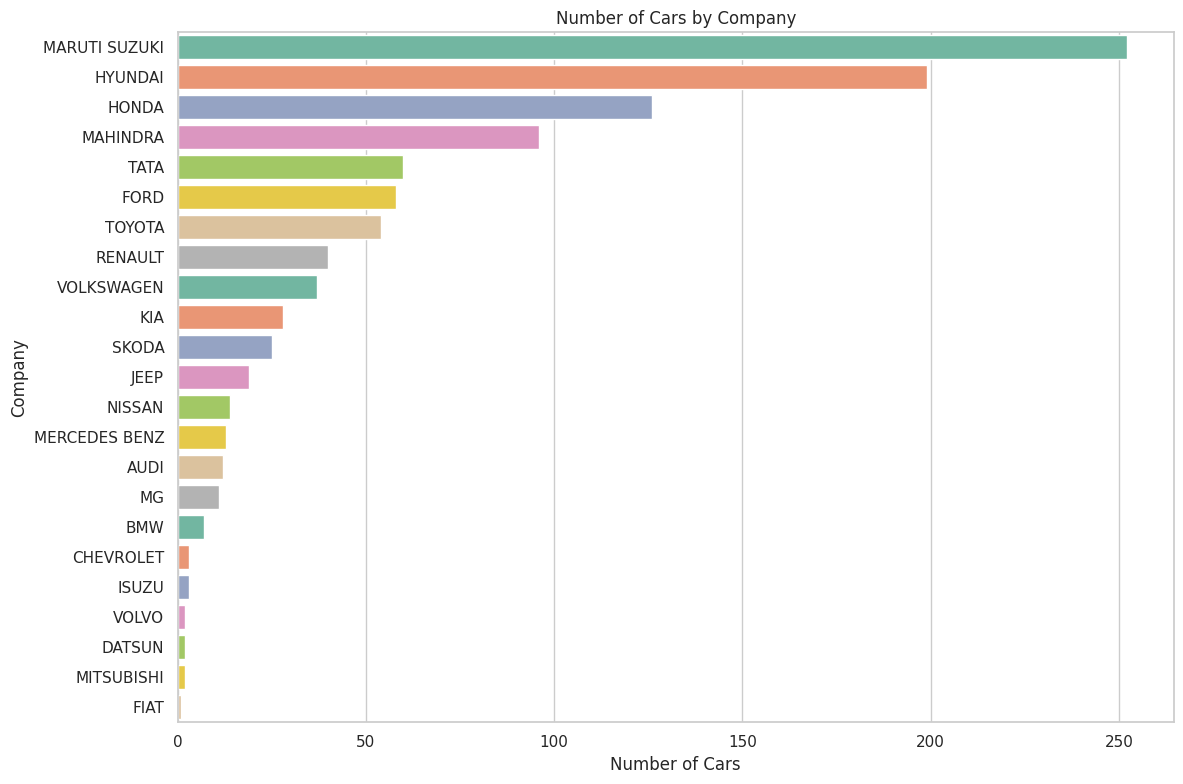

In [92]:
plt.figure(figsize=(12, 8))
sns.barplot(
    y=df['Company'].value_counts().index,
    x=df['Company'].value_counts().values,
    palette='Set2'
)
plt.xlabel('Number of Cars')
plt.ylabel('Company')
plt.title('Number of Cars by Company')
plt.tight_layout()
plt.show()


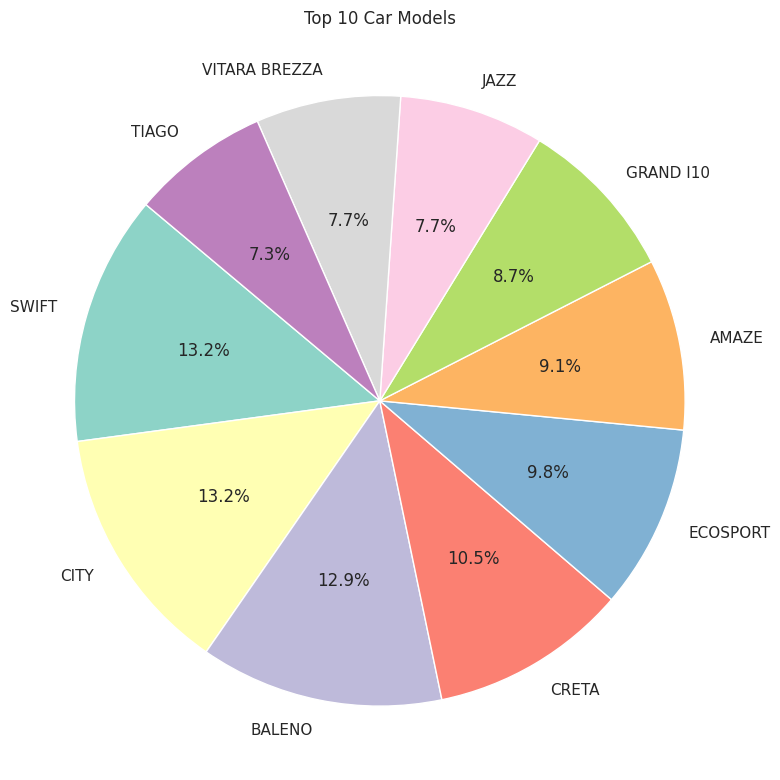

In [93]:
top_models = df['Model'].value_counts().iloc[:10]

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    top_models.values,
    labels=top_models.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('Set3')
)
plt.title('Top 10 Car Models')
plt.axis('equal')
plt.tight_layout()
plt.show()

<ipython-input-94-768f39112787>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


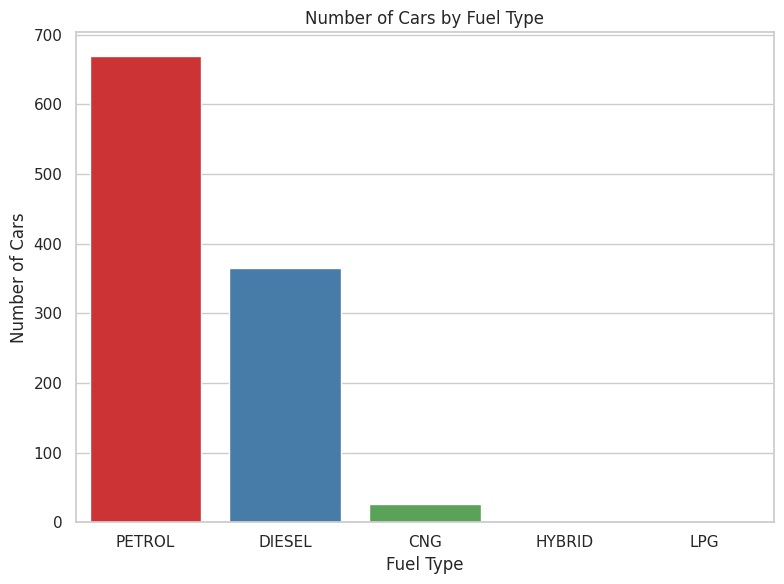

In [94]:
plt.figure(figsize=(8, 6))
sns.countplot(
    x='FuelType',
    data=df,
    palette='Set1'
).set_title('Number of Cars by Fuel Type')

plt.xlabel('Fuel Type')
plt.ylabel('Number of Cars')
plt.tight_layout()
plt.show()

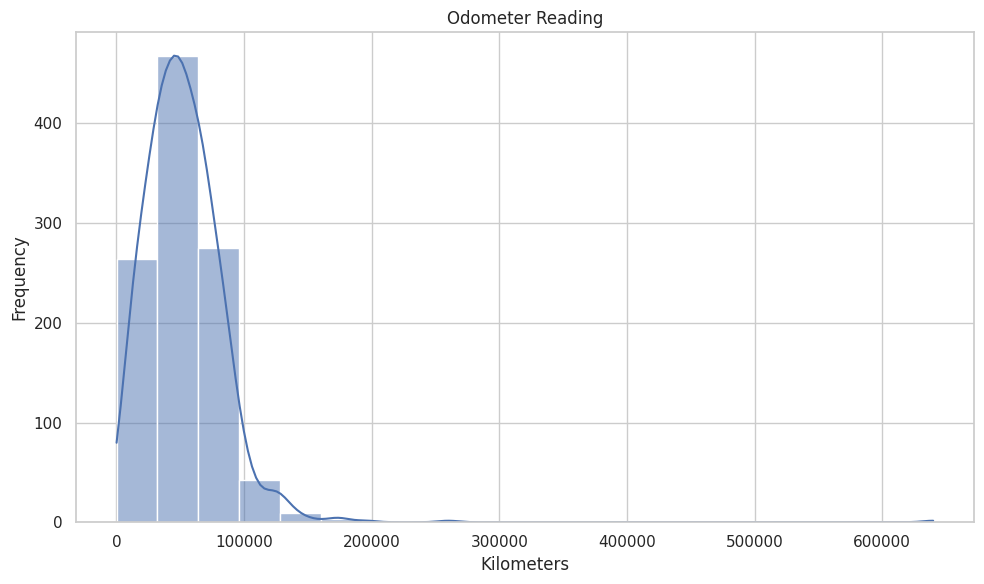

In [95]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Kilometer', bins=20, kde=True)
plt.title('Odometer Reading')
plt.xlabel('Kilometers')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

<ipython-input-96-037ddc080018>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='BodyStyle', palette='Set2')


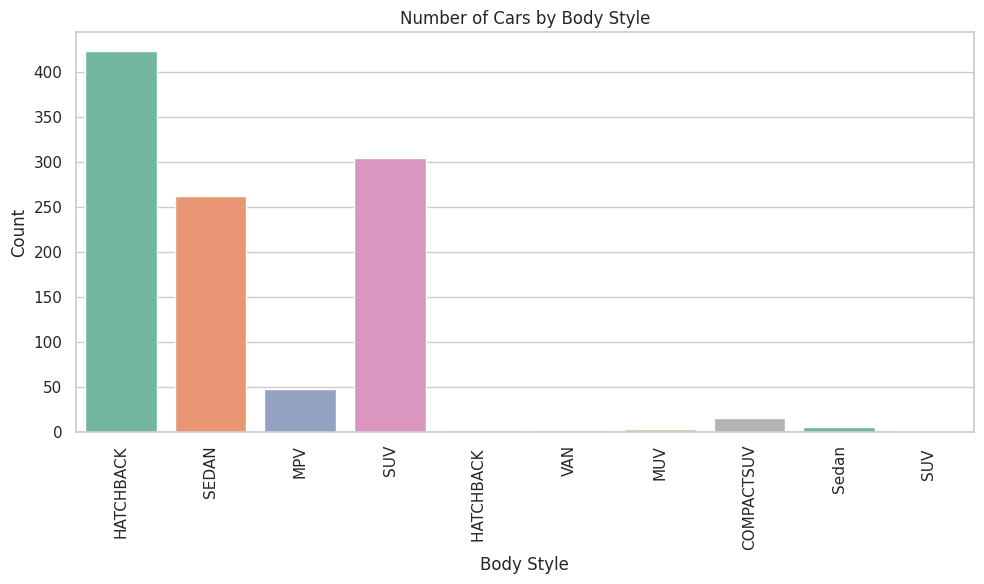

In [96]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='BodyStyle', palette='Set2')
plt.title('Number of Cars by Body Style')
plt.xlabel('Body Style')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

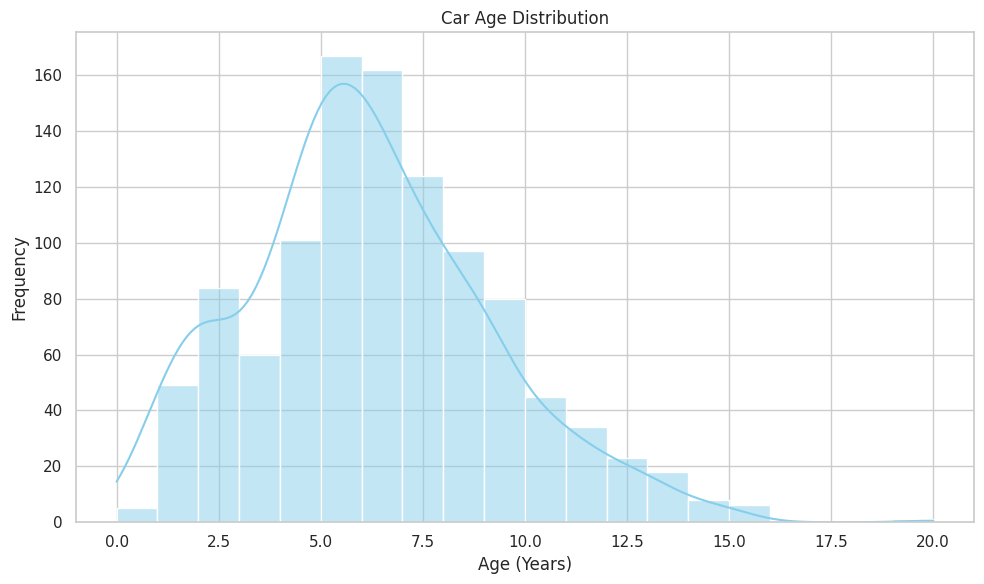

In [97]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Car Age', bins=20, kde=True, color='skyblue')
plt.title('Car Age Distribution')
plt.xlabel('Age (Years)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

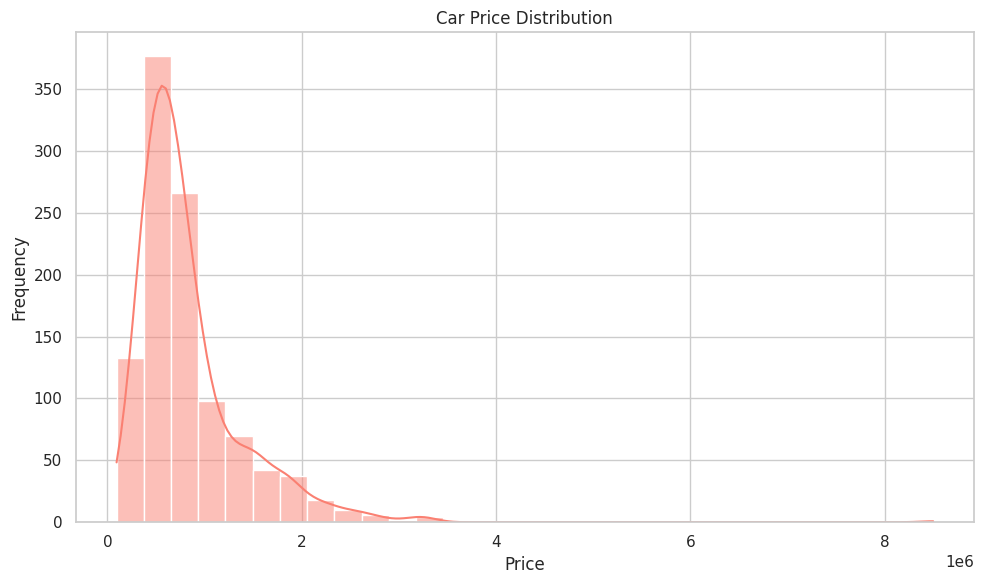

In [98]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Price', bins=30, kde=True, color='salmon')
plt.title('Car Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

This graph help us to know about the distribution of the car prices in the dataset. In the dataset, most of the cars have price is between 3 to 9 lakhs, with maximum cars between 3 to 6 lakhs. Therefore, we can assume that cars with price between 3 to 9 lakhs are more in demand in the used car market. Moreover there are some cars with resale price more than 20 lakhs, which could be possible for luxury cars or it could be an outlier.

<ipython-input-99-ea63965c0931>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='DealerState', ax=ax[0], palette='Set2')
<ipython-input-99-ea63965c0931>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='City', ax=ax[1], palette='Set3')
<ipython-input-99-ea63965c0931>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='DealerName', order=top_10_dealers, ax=ax[2], palette='Set1')


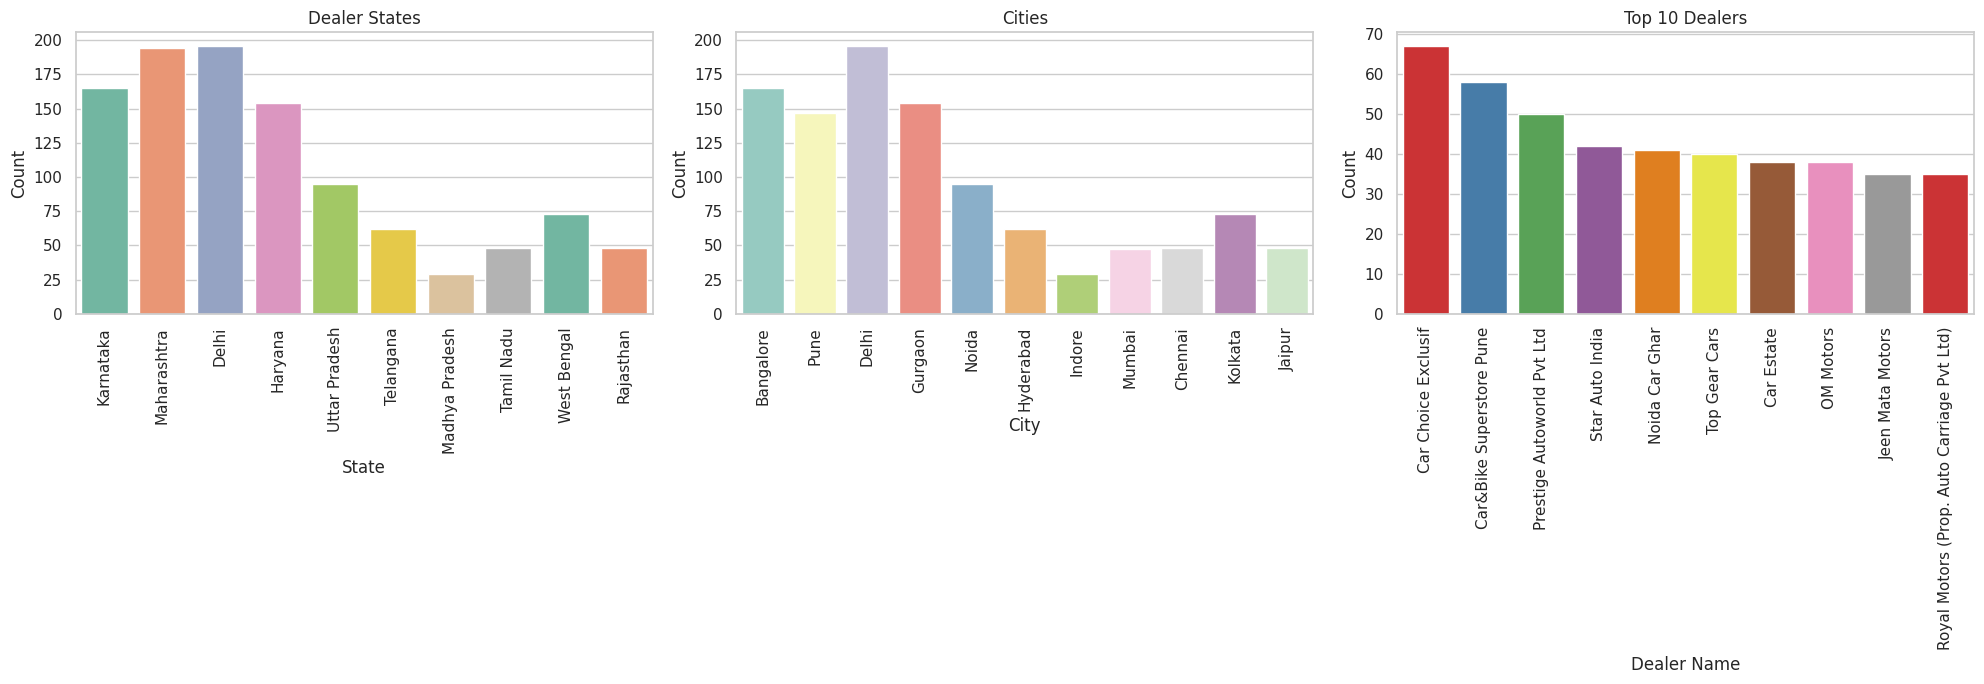

In [99]:
fig, ax = plt.subplots(1, 3, figsize=(20, 7))

# Plot 1: Dealer State
sns.countplot(data=df, x='DealerState', ax=ax[0], palette='Set2')
ax[0].set_title('Dealer States')
ax[0].set_xlabel('State')
ax[0].set_ylabel('Count')
ax[0].tick_params(axis='x', rotation=90)

# Plot 2: City
sns.countplot(data=df, x='City', ax=ax[1], palette='Set3')
ax[1].set_title('Cities')
ax[1].set_xlabel('City')
ax[1].set_ylabel('Count')
ax[1].tick_params(axis='x', rotation=90)

# Plot 3: Top 10 Dealers
top_10_dealers = df['DealerName'].value_counts().iloc[:10].index
sns.countplot(data=df, x='DealerName', order=top_10_dealers, ax=ax[2], palette='Set1')
ax[2].set_title('Top 10 Dealers')
ax[2].set_xlabel('Dealer Name')
ax[2].set_ylabel('Count')
ax[2].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

<ipython-input-100-aa7bcd1e687e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Owner', palette='pastel', order=df['Owner'].value_counts().index)


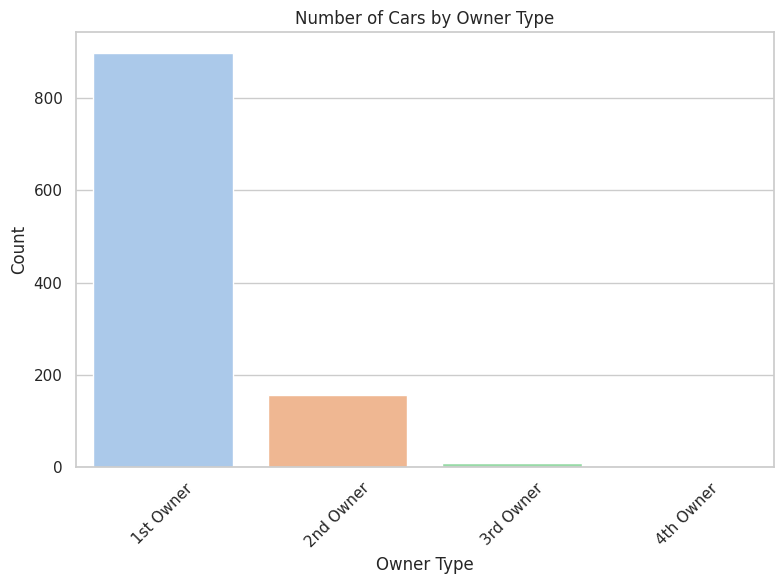

In [100]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Owner', palette='pastel', order=df['Owner'].value_counts().index)
plt.title('Number of Cars by Owner Type')
plt.xlabel('Owner Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The car owner type has a huge impact on its resale value. Majority of the cars that are been sold are 1at Owner cars followed by 2nd Owner cars which are significantly less in number as compared to 1st Owner. Moreover, the 3rd and 4th owner cars are very less in number. Therefore, we can assume that 1st Owner cars are more preferred in the used car market and have a good resale value.

<ipython-input-101-334133ff3fd3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


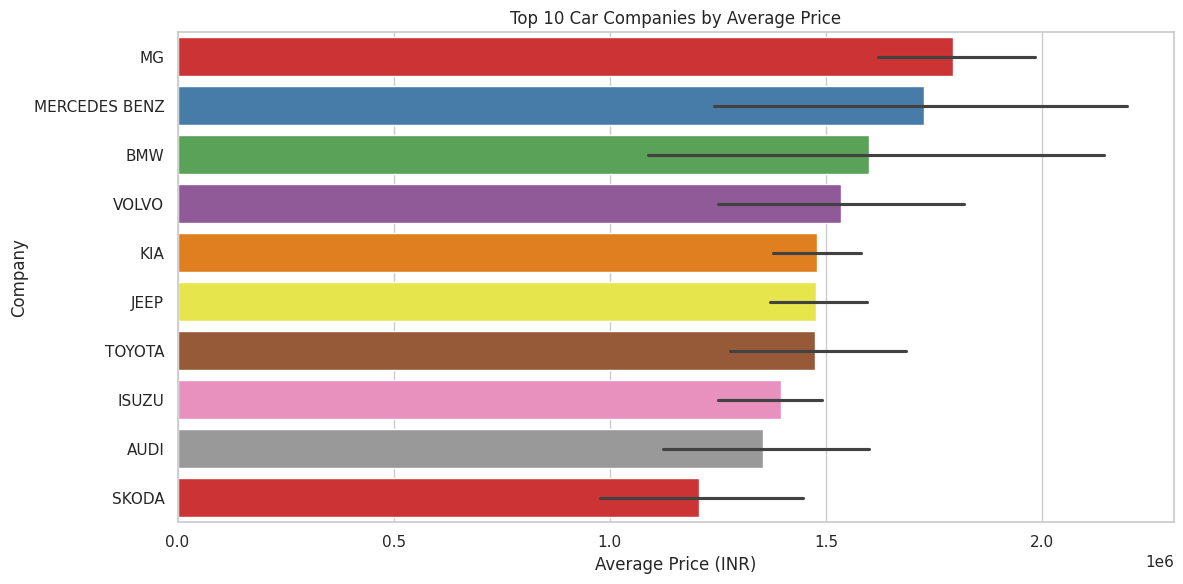

In [101]:
top_10_companies = df.groupby('Company')['Price'].mean().sort_values(ascending=False).iloc[:10].index
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df[df['Company'].isin(top_10_companies)],
    x='Price',
    y='Company',
    order=top_10_companies,
    palette='Set1'
)
plt.title('Top 10 Car Companies by Average Price')
plt.xlabel('Average Price (INR)')
plt.ylabel('Company')
plt.tight_layout()
plt.show()

This graphs highlights the top 10 car companies in the dataset with the highest resale value. The MG, Mercedes Benz and BMW are the top 3 car companies with the highest resale value, since these are luxury car companies. The list also includes Volvo. followed by KIA, Jeep and Toyota. Surprisingly Audi has much lower resale price has compared to the other luxury car companies which might be due to other features.

Moreover, my prevous hypothesis, about the car companies -Maruti Suzuki, Hyundai, Honda, Mahindra and Tata, was wrong as they are not in the top 10 list. This means that these companies cars are in greater number due to their demand because of low price

<ipython-input-102-cafb87122c92>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


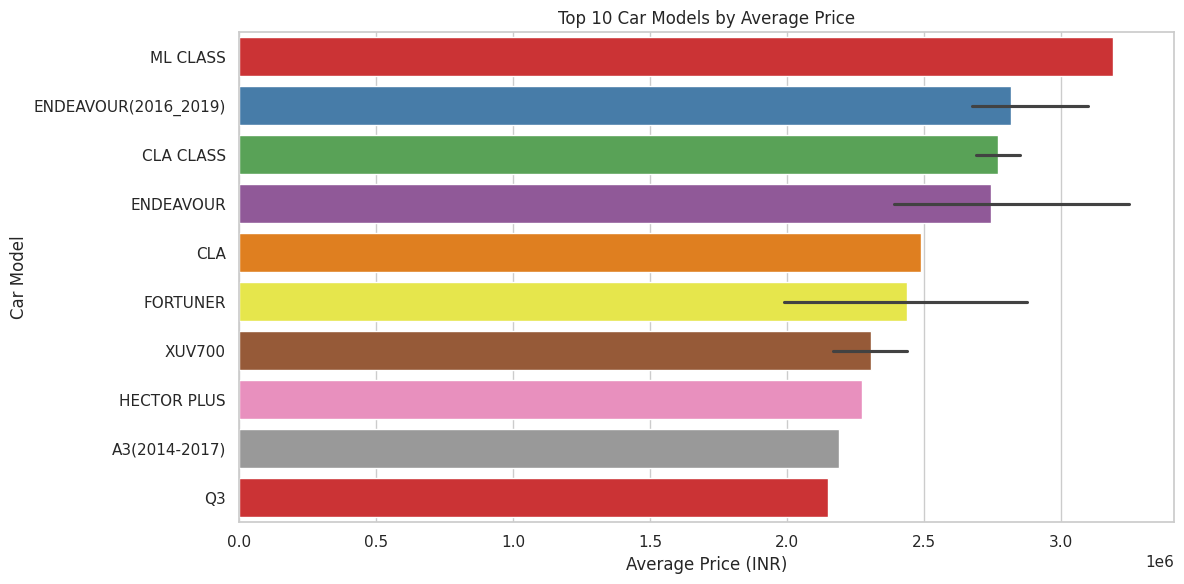

In [102]:
top_10_models = df.groupby('Model')['Price'].mean().sort_values(ascending=False).iloc[:10].index

plt.figure(figsize=(12, 6))
sns.barplot(
    data=df[df['Model'].isin(top_10_models)],
    x='Price',
    y='Model',
    order=top_10_models,
    palette='Set1'
)

plt.title('Top 10 Car Models by Average Price')
plt.xlabel('Average Price (INR)')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()

This graph shows the relation between the car model and it resale value and we can see that it shows similarity with the previous graph. The car models - ML Class, Endeavour(2016_2019), CLA class are the top three models with highest resale value, followed by CLA, Fortuner and XUV700. Like the previous graph, the audi model A3 is at the 9th position with a much lower resale value as compared to the other models.

In the car model also my hypothesis was wrong as I assummed that Honda City and Swift are the top two car models in the dataset, followed by Baleno, Creata and EcoSport. Therefore, we came to know that these car in higher number due to their high demnad because of low price.

<ipython-input-103-c6a80f3f8cfb>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


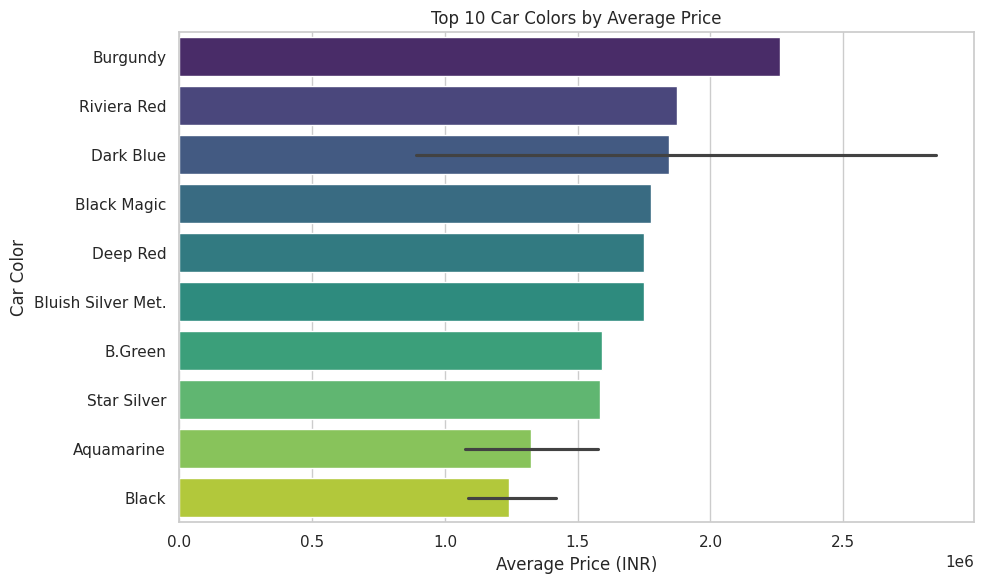

In [103]:
top_colors = df.groupby('Colour')['Price'].mean().sort_values(ascending=False).iloc[:10].index

plt.figure(figsize=(10, 6))
sns.barplot(
    data=df[df['Colour'].isin(top_colors)],
    x='Price',
    y='Colour',
    order=top_colors,
    palette='viridis'
)

plt.title('Top 10 Car Colors by Average Price')
plt.xlabel('Average Price (INR)')
plt.ylabel('Car Color')
plt.tight_layout()
plt.show()

The cars with colors like Burgundy, Riviera Red and Dark Blue have higher resale value as compared to other colors. This shows that color of the car does matter and plays a major role in the resale value of the car.

Moreover, we also came to know that exotic colors have more price but they are not in demand in the used car market.

**Data Preprocessing**

In [104]:
df.drop('Model', axis = 1, inplace = True)

In [105]:
from sklearn.preprocessing import LabelEncoder

cat_cols = df.select_dtypes(include='object').columns

le = LabelEncoder()

encoders = {}

for col in cat_cols:
    df[col] = df[col].astype(str)
    df[col] = le.fit_transform(df[col])
    encoders[col] = le.classes_
    print(f"{col}: {df[col].unique()}")


Company: [12  7 19  5 13 21 11  6 17 16  9  4 20 10  1  3 18 14  0  8 22 15  2]
FuelType: [4 1 0 2 5 3]
Colour: [61 56 34  0  9 11 66 47 49 38 14 71 72 30 74 52 39 28 60  7 54 62 40 13
 20 70 63 12 24 23 35 26 29 15 31  1 68  4  8 73 22 44 57 65 42 50 32 64
 19 43 46 33 16 27 53 25 10 69 51 17  6 48 59 58  5  3 18 45 67 36 21 55
  2 37 75 41]
BodyStyle: [1 5 3 6 2 9 4 0 8 7]
Owner: [0 1 2 3]
DealerState: [2 4 0 1 8 7 3 6 9 5]
DealerName: [52 38  4  1 56 29  0 34 47 51 11 21  9 10 43 33  7 16  5 12 42 17 27 50
 45  6 20 36 23 41 32 31 18  2 48 15 54 40 55 13 49 25 35 46 24 14 44 19
 39 28 26  3 53 30  8 22 37]
City: [ 0 10  2  3  9  4  5  8  1  7  6]


In [106]:
cols = df.select_dtypes(include=['int64','float64']).columns
Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)

IQR = Q3 - Q1

df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

<Axes: >

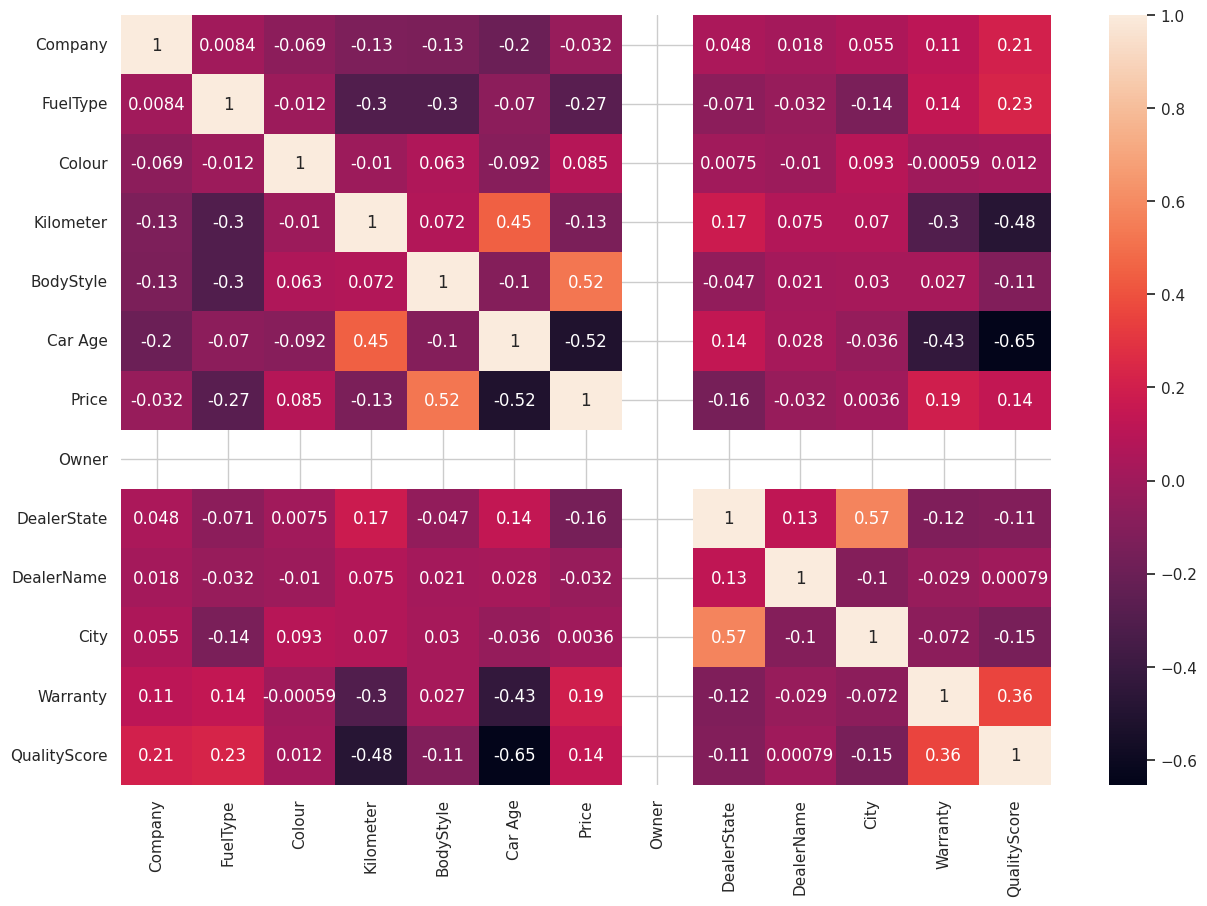

In [107]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)

**Training**

In [108]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Price',axis=1), df['Price'], test_size=0.2, random_state=42)

##**Model Building**
I will be using the following regression models:
- Decision Tree Regressor
- Random Forest Regressor

##Decision Tree Regressor

In [109]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()

In [110]:
from sklearn.model_selection import GridSearchCV
para = {
    'max_depth' : [2,4,6,8],
    'min_samples_leaf' : [2,4,6,8],
    'min_samples_split' : [2,4,6,8],
    'random_state' : [0,42]
}

grid = GridSearchCV(estimator=dtr, param_grid=para, cv=5, n_jobs=-1, verbose=2)

grid.fit(X_train, y_train)

print(grid.best_params_)

Fitting 5 folds for each of 128 candidates, totalling 640 fits
{'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 2, 'random_state': 0}


In [111]:
dtr = DecisionTreeRegressor(max_depth=6, min_samples_leaf=2, min_samples_split=2, random_state=42)

dtr.fit(X_train, y_train)

print(dtr.score(X_train, y_train))

0.7709748363868894


In [112]:
dtr_pred = dtr.predict(X_test)

##Random Forest Regressor

In [113]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()

In [114]:
from sklearn.model_selection import GridSearchCV

para = {
    'max_depth' : [2,4,6,8],
    'min_samples_leaf' : [2,4,6,8],
    'min_samples_split' : [2,4,6,8],
    'random_state' : [0,42]
}
grid = GridSearchCV(estimator=rfr, param_grid=para, cv=5, n_jobs=-1, verbose=2)

grid.fit(X_train, y_train)

print(grid.best_params_)

Fitting 5 folds for each of 128 candidates, totalling 640 fits
{'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 2, 'random_state': 0}


In [115]:
rfr = RandomForestRegressor(max_depth=8, min_samples_leaf=2, min_samples_split=2, random_state=0)

rfr.fit(X_train, y_train)

print(rfr.score(X_train, y_train))

0.8922093892033637


In [116]:
rfr_pred = rfr.predict(X_test)

##Model Evaluation

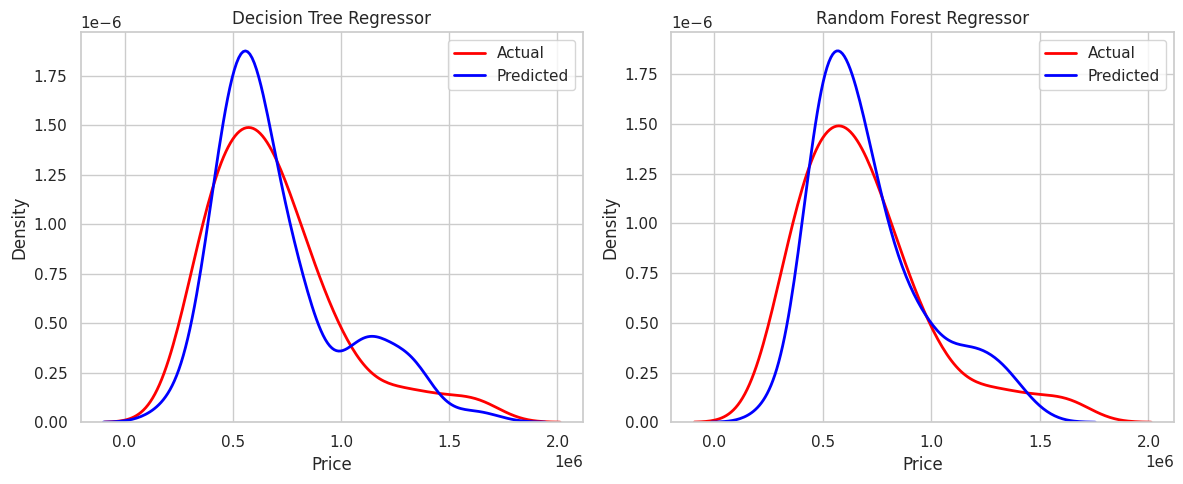

In [117]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# --- Decision Tree Regressor ---
sns.kdeplot(x=y_test, ax=ax[0], color='red', label='Actual', linewidth=2)
sns.kdeplot(x=dtr_pred, ax=ax[0], color='blue', label='Predicted', linewidth=2)
ax[0].set_title('Decision Tree Regressor')
ax[0].legend()

# --- Random Forest Regressor ---
sns.kdeplot(x=y_test, ax=ax[1], color='red', label='Actual', linewidth=2)
sns.kdeplot(x=rfr_pred, ax=ax[1], color='blue', label='Predicted', linewidth=2)
ax[1].set_title('Random Forest Regressor')
ax[1].legend()

plt.tight_layout()
plt.show()

In [118]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print('Decision Tree Regressor')
print('Mean Squared Error : ', mean_squared_error(y_test, dtr_pred))
print('Mean Absolute Error : ', mean_absolute_error(y_test, dtr_pred))
print('R2 Score : ', r2_score(y_test, dtr_pred))

print('Random Forest Regressor')
print('Mean Squared Error : ', mean_squared_error(y_test, rfr_pred))
print('Mean Absolute Error : ', mean_absolute_error(y_test, rfr_pred))
print('R2 Score : ', r2_score(y_test, rfr_pred))

Decision Tree Regressor
Mean Squared Error :  45585786671.20511
Mean Absolute Error :  143988.5965345904
R2 Score :  0.5044410153036336
Random Forest Regressor
Mean Squared Error :  28952122030.700592
Mean Absolute Error :  122585.28783370154
R2 Score :  0.6852640867684735


<ipython-input-119-52d3cdebda21>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-119-52d3cdebda21>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


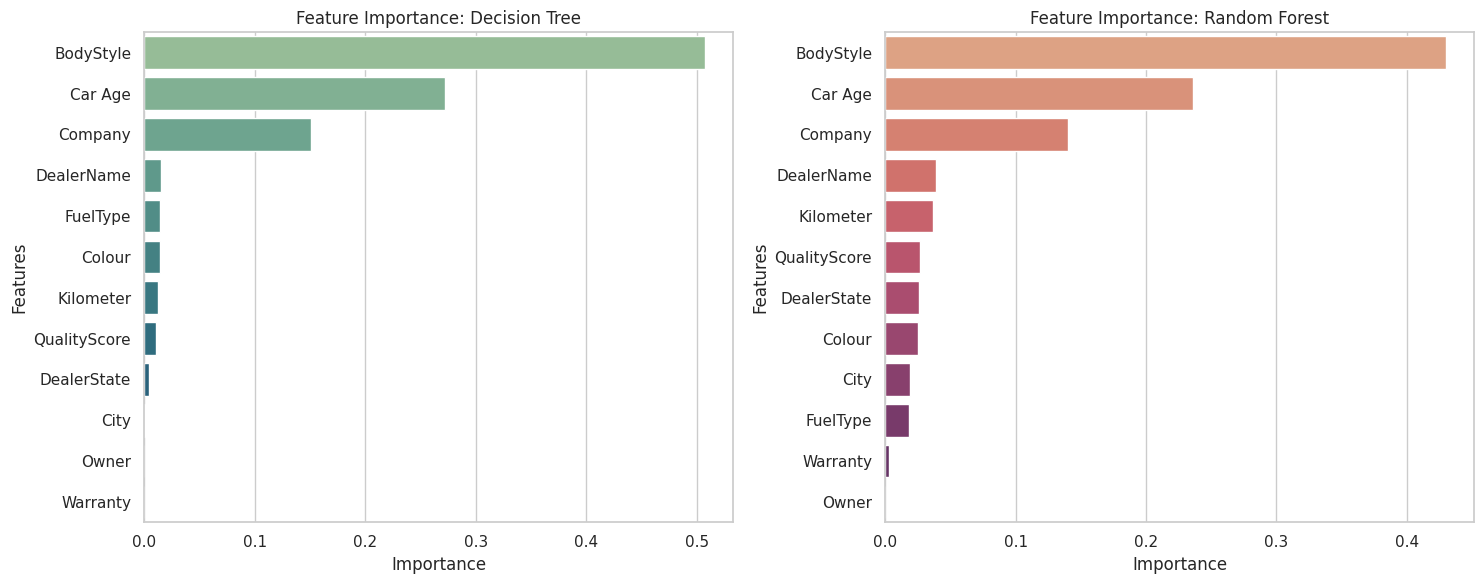

In [119]:
sns.set(style="whitegrid")

fig, ax = plt.subplots(1, 2, figsize=(15, 6))
fig.subplots_adjust(wspace=0.4)

# --- Decision Tree Regressor ---
dtr_importances = pd.DataFrame({
    'Features': X_train.columns,
    'Importance': dtr.feature_importances_
}).sort_values(by='Importance', ascending=False)

sns.barplot(
    data=dtr_importances,
    x='Importance',
    y='Features',
    ax=ax[0],
    palette='crest'
)
ax[0].set_title('Feature Importance: Decision Tree')

# --- Random Forest Regressor ---
rfr_importances = pd.DataFrame({
    'Features': X_train.columns,
    'Importance': rfr.feature_importances_
}).sort_values(by='Importance', ascending=False)

sns.barplot(
    data=rfr_importances,
    x='Importance',
    y='Features',
    ax=ax[1],
    palette='flare'
)
ax[1].set_title('Feature Importance: Random Forest')

plt.tight_layout()
plt.show()

##Conclusion

From the exploratory data analysis, I have revealed two major facts about the used car market: demand and price. The demand for low-priced used cars is significantly higher compared to expensive ones, which highlights customers' preference for budget-friendly vehicles. However, upon studying the graphs, I also discovered some interesting insights into the used car market.

Starting with car companies—brands like MG, Mercedes-Benz, BMW, Volvo, and KIA have the highest prices. In contrast, Maruti Suzuki, Hyundai, Honda, Mahindra, and Tata cars are in higher demand. This suggests that customers prefer to buy new luxury cars rather than used ones.

The majority of cars run either on petrol or diesel, with diesel cars having slightly higher prices. I also observed that car color is a major factor in the market. Colors like white, grey, silver, and black are in high demand, while exotic colors like burgundy, riviera red, dark blue, and black magic tend to have higher prices.

Regarding the odometer reading, most cars have readings below 10,000 km, and those with lower readings tend to be priced higher. In terms of body style, Hatchback, SUV, and Sedan are the most preferred by customers, whereas MPV, SUV, and Sedan are the most expensive.

The age of the car also plays a significant role in its resale value. As the car's age increases, its resale value decreases. Therefore, cars that are less than 5 years old tend to have higher prices and are more preferred. Car prices also vary by location. Delhi, Maharashtra, and Rajasthan are the top three states with the highest prices, and Car Estate, Star Auto India, and Car Choice are the top three dealers offering the most expensive cars.

Customers usually prefer cars with a first-owner type, which results in higher demand as well as higher prices. Cars that come with a warranty provide assurance to the buyer, leading to a slightly higher price. The final feature, quality score, also influences the price—cars with a higher quality score are priced higher.

Regarding the machine learning models, I used Decision Tree Regressor and Random Forest Regressor to predict car prices. The Random Forest Regressor performed better than the Decision Tree model. Moreover, from the feature importance graph, we can see that car age, body style, and company are the key features that significantly impact car price.